This Colab is Created By : Miftahul Arifin

Colab ini berisikan rekap pembelajaran Data Preprocessing dari pelatihan Data Science DigitalSkola.

# Ringkasan Isi Rekap

# Connect to G-Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
drive_loc = '/content/drive/MyDrive/DS_DATAPREPROCESSING'
os.chdir(drive_loc)

# Import Library

In [ ]:
# Dataframe Manipulation
import pandas as pd
import numpy as np

# Dataframe Visualization
import matplotlib.pyplot as plt

# Machine Learning Library
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Data Preprocessing Bagian I
Pada data Preprocessing Bagian 1 ini, kita akan mempelajari terkait handling null value pada dataset, dengan menggunakan library sklearn. seperti mengisi null value dengan mean, median, mode, dan juga nilai tetap.

selain itu kita akan belajar terkait standarisasi nilai, sehingga nilai variasi tidak terlalu jauh

## Hiking Dataset

In [ ]:
df_hiking = pd.read_json('hiking.json')
df_hiking.head()

,Prop_ID,Name,Location,Park_Name,Length,Difficulty,Other_Details,Accessible,Limited_Access,lat,lon
0,B057,Salt Marsh Nature Trail,"Enter behind the Salt Marsh Nature Center, loc...",Marine Park,0.8 miles,None,<p>The first half of this mile-long trail foll...,Y,N,NaN,NaN
1,B073,Lullwater,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,1.0 mile,Easy,Explore the Lullwater to see how nature thrive...,N,N,NaN,NaN
2,B073,Midwood,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.75 miles,Easy,Step back in time with a walk through Brooklyn...,N,N,NaN,NaN
3,B073,Peninsula,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Discover how the Peninsula has changed over th...,N,N,NaN,NaN
4,B073,Waterfall,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Trace the source of the Lake on the Waterfall ...,N,N,NaN,NaN


In [ ]:
df_hiking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Prop_ID         33 non-null     object 
 1   Name            33 non-null     object 
 2   Location        33 non-null     object 
 3   Park_Name       33 non-null     object 
 4   Length          29 non-null     object 
 5   Difficulty      25 non-null     object 
 6   Other_Details   29 non-null     object 
 7   Accessible      33 non-null     object 
 8   Limited_Access  33 non-null     object 
 9   lat             0 non-null      float64
 10  lon             0 non-null      float64
dtypes: float64(2), object(9)
memory usage: 3.1+ KB


## Hiking Dataset Cleaning

### Removing columns lat, lon thats all values is null value

dari dataframe information kita dapat notice bahwa kolom lat, dan lon, tidak memberikan informasi apapun, dikarenakan memiliki nilai null pada semua baris. disini kita dapat melakukan menghilangkan kolom tersebut.

In [ ]:
df_hiking.drop(['lat', 'lon'], axis=1, inplace=True)
df_hiking.head()

,Prop_ID,Name,Location,Park_Name,Length,Difficulty,Other_Details,Accessible,Limited_Access
0,B057,Salt Marsh Nature Trail,"Enter behind the Salt Marsh Nature Center, loc...",Marine Park,0.8 miles,None,<p>The first half of this mile-long trail foll...,Y,N
1,B073,Lullwater,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,1.0 mile,Easy,Explore the Lullwater to see how nature thrive...,N,N
2,B073,Midwood,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.75 miles,Easy,Step back in time with a walk through Brooklyn...,N,N
3,B073,Peninsula,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Discover how the Peninsula has changed over th...,N,N
4,B073,Waterfall,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Trace the source of the Lake on the Waterfall ...,N,N


### Change lenght to float type

In [ ]:
df_hiking['Length'].unique()

array(['0.8 miles', '1.0 mile', '0.75 miles', '0.5 miles', 'Various',
       '1.7 miles', '2.4 miles', '3.0 miles', '12.3 miles', '0.85 miles',
       '4.0 miles', '7.6 miles', '8.0 miles', '0.25 miles', '1.4 miles',
       '1.25 miles', '1.5 miles', '1.1 mile', '1.2 miles', None],
      dtype=object)

terdapat string miles, dan mile pada kolomg length. serta terdapat nilai none pada miles.

In [ ]:
df_hiking.rename({
    'Length' : 'Length(miles)'
}, axis=1, inplace=True)

In [ ]:
# Terdapat 4 Nilai null value pada kolom Length(miles)
df_hiking['Length(miles)'].isnull().sum()

4

Removing String value in Length(miles) columns, and change the values into float.

In [ ]:
df_hiking['Length(miles)'] = df_hiking['Length(miles)'].replace(['miles', 'mile'], '', regex=True)

In [ ]:
df_hiking['Length(miles)'] = df_hiking['Length(miles)'].replace(['Various'], '', regex=True)

In [ ]:
df_hiking['Length(miles)'] = df_hiking['Length(miles)'].replace('', None, regex=True)

In [ ]:
df_hiking['Length(miles)'].unique()

array(['0.8 ', '1.0 ', '0.75 ', '0.5 ', None, '1.7 ', '2.4 ', '3.0 ',
       '12.3 ', '0.85 ', '4.0 ', '7.6 ', '8.0 ', '0.25 ', '1.4 ', '1.25 ',
       '1.5 ', '1.1 ', '1.2 '], dtype=object)

In [ ]:
df_hiking['Length(miles)'] = df_hiking['Length(miles)'].astype(float)

In [ ]:
df_hiking['Length(miles)'].unique()

array([ 0.8 ,  1.  ,  0.75,  0.5 ,   nan,  1.7 ,  2.4 ,  3.  , 12.3 ,
        0.85,  4.  ,  7.6 ,  8.  ,  0.25,  1.4 ,  1.25,  1.5 ,  1.1 ,
        1.2 ])

In [ ]:
df_hiking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Prop_ID         33 non-null     object 
 1   Name            33 non-null     object 
 2   Location        33 non-null     object 
 3   Park_Name       33 non-null     object 
 4   Length(miles)   28 non-null     float64
 5   Difficulty      25 non-null     object 
 6   Other_Details   29 non-null     object 
 7   Accessible      33 non-null     object 
 8   Limited_Access  33 non-null     object 
dtypes: float64(1), object(8)
memory usage: 2.6+ KB


## College Dataset

In [ ]:
df_college = pd.read_csv('college.csv')
df_college.head()

,gradrat,lenroll,rmbrd,private,stufac,csat,act
0,59.0,5.1761497326,3.75,1.0,10.8,.,21.0
1,52.0,4.7791234931,3.74,1.0,17.7,.,21.0
2,75.0,6.122492809500001,.,1.0,11.4,1052.0,24.0
3,56.0,5.3181199938,4.1,1.0,11.6,940.0,23.0
4,71.0,5.631211781799999,.,1.0,18.3,.,17.0


In [ ]:
df_college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gradrat  200 non-null    object 
 1   lenroll  200 non-null    object 
 2   rmbrd    200 non-null    object 
 3   private  200 non-null    float64
 4   stufac   200 non-null    object 
 5   csat     200 non-null    object 
 6   act      200 non-null    object 
dtypes: float64(1), object(6)
memory usage: 11.1+ KB


### Handling Missing Value in College Dataset

In [ ]:
df_college = pd.read_csv('college.csv', na_values = '.')
df_college.head()

,gradrat,lenroll,rmbrd,private,stufac,csat,act
0,59.0,5.176150,3.75,1.0,10.8,NaN,21.0
1,52.0,4.779123,3.74,1.0,17.7,NaN,21.0
2,75.0,6.122493,NaN,1.0,11.4,1052.0,24.0
3,56.0,5.318120,4.10,1.0,11.6,940.0,23.0
4,71.0,5.631212,NaN,1.0,18.3,NaN,17.0


## Diabetes Dataset

In [ ]:
df_diabetes = pd.read_csv('pima-indians-diabetes.csv')
df_diabetes.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


### EDA Diabetes Dataset

In [ ]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    float64
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                768 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [ ]:
df_diabetes.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Dari df_diabetes.info() dan df_diabetes.describe() kita dapat mengetahui
- informasi bahwa nilai terkecil BMI yakni 0. hal ini tidak mungkin dikarenakan berat badan tidak mungkin bernilai 0
- Age dari float ubah ke int


### Checking BMI = 0

In [ ]:
df_diabetes.loc[df_diabetes['BMI'] == 0, 'BMI'] = np.nan

In [ ]:
df_diabetes[df_diabetes['BMI'] == 0]

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class


In [ ]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    float64
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [ ]:
df_diabetes.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df_diabetes.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


### Age Changing Type float to int

In [ ]:
df_diabetes['Age'] = df_diabetes['Age'].astype(int)

## Imputation Basic Technique


Imputasi adalah proses mengisi nilai yang hilang pada data dengan nilai yang diperkirakan. Fungsi imputasi adalah untuk memperbaiki kualitas data dengan membuat data menjadi lengkap dan siap untuk dianalisis.

Imputasi penting dilakukan karena data yang hilang dapat menyebabkan bias dalam hasil analisis. Misalnya, jika kita ingin menganalisis hubungan antara pendapatan dan pengeluaran, tetapi ada beberapa data pendapatan yang hilang, hasil analisis kita mungkin tidak akurat.

Ada berbagai metode imputasi yang dapat digunakan, masing-masing dengan kelebihan dan kekurangannya. Beberapa metode imputasi yang umum digunakan adalah:

- Mean imputation: Mengisi nilai yang hilang dengan rata-rata nilai yang diketahui.
- Median imputation: Mengisi nilai yang hilang dengan median nilai yang diketahui.
- Mode imputation: Mengisi nilai yang hilang dengan modus nilai yang diketahui.
- Klasterisasi: Mengisi nilai yang hilang dengan nilai dari data yang memiliki karakteristik yang sama.
- Regresi: Menggunakan model regresi untuk memprediksi nilai yang hilang.
Metode imputasi yang dipilih harus disesuaikan dengan karakteristik data dan tujuan analisis.

Berikut adalah beberapa manfaat imputasi:

- Meningkatkan akurasi analisis: Imputasi dapat membantu memperbaiki akurasi analisis dengan membuat data menjadi lengkap.
- Meningkatkan efisiensi analisis: Imputasi dapat membantu mengurangi jumlah data yang hilang, sehingga analisis dapat dilakukan lebih efisien.
- Meningkatkan interpretabilitas analisis: Imputasi dapat membantu meningkatkan interpretabilitas analisis dengan membuat data menjadi lebih lengkap.

Imputasi adalah teknik yang penting untuk digunakan dalam analisis data. Dengan menggunakan imputasi, kita dapat meningkatkan kualitas data dan hasil analisis.

In [ ]:
df_diabetes.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


### Mean Imputer

In [ ]:
mean_imputer = SimpleImputer(strategy='mean')
df_mean = mean_imputer.fit_transform(df_diabetes)
pd.DataFrame(df_mean, columns=df_diabetes.columns).head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


Dari Hasil code diatas, kita dapat menuliskan code lainnya dengan lebih baik seperti dibawah ini.

In [ ]:
mean_imputer = SimpleImputer(strategy='mean')
df_diabetes_mean = pd.DataFrame(
    data = mean_imputer.fit_transform(df_diabetes),
    columns = df_diabetes.columns
)

In [ ]:
df_diabetes_mean.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


### Median Imputer

In [ ]:
Median_imputer = SimpleImputer(strategy='median')
df_diabetes_median = pd.DataFrame(
    data=Median_imputer.fit_transform(df_diabetes),
    columns=df_diabetes.columns
)

In [ ]:
df_diabetes_median.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


### Mode Imputer

In [ ]:
mode_imputer = SimpleImputer(strategy='most_frequent')
df_diabetes_mode = pd.DataFrame(
    data=mode_imputer.fit_transform(df_diabetes),
    columns=df_diabetes.columns
)

In [ ]:
df_diabetes_mode.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,105.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,105.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,32.0,105.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


### Constant Imputer

In [ ]:
constant_imputer = SimpleImputer(strategy='constant', fill_value= 0)
df_diabetes_constan = pd.DataFrame(
    data=constant_imputer.fit_transform(df_diabetes),
    columns = df_diabetes.columns
)

In [ ]:
df_diabetes_constan.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


### ScatterPlot Imputation

In [ ]:
plt.style.use('ggplot')

In [ ]:
nullity = df_diabetes['Serum_Insulin'].isnull() + df_diabetes['Glucose'].isnull()

<Axes: title={'center': 'Mean Imputation'}, xlabel='Serum_Insulin', ylabel='Glucose'>

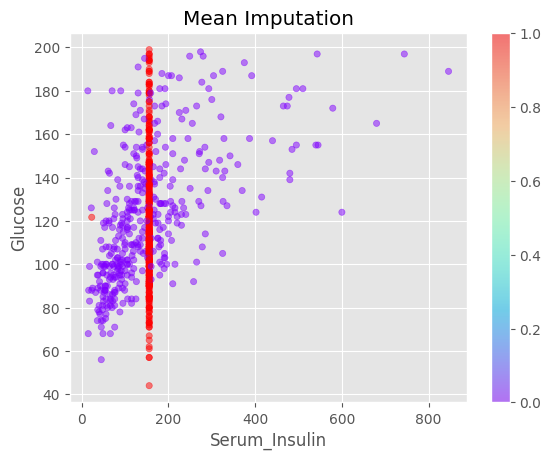

In [ ]:
df_diabetes_mean.plot(
    x='Serum_Insulin',
    y='Glucose',
    kind='scatter',
    alpha=0.5, # untuk transparasi
    c=nullity,
    cmap='rainbow',
    title='Mean Imputation'
)

<Axes: title={'center': 'Median Imputation'}, xlabel='Serum_Insulin', ylabel='Glucose'>

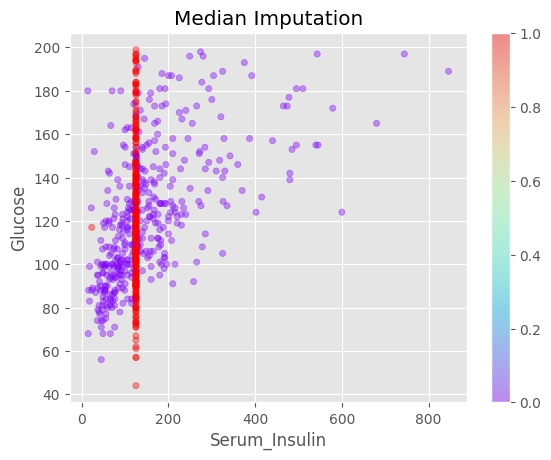

In [ ]:
df_diabetes_median.plot(
    x='Serum_Insulin',
    y='Glucose',
    kind='scatter',
    alpha=0.4,
    c=nullity,
    cmap='rainbow',
    title='Median Imputation'
)

<Axes: title={'center': 'Median Imputation'}, xlabel='Serum_Insulin', ylabel='Glucose'>

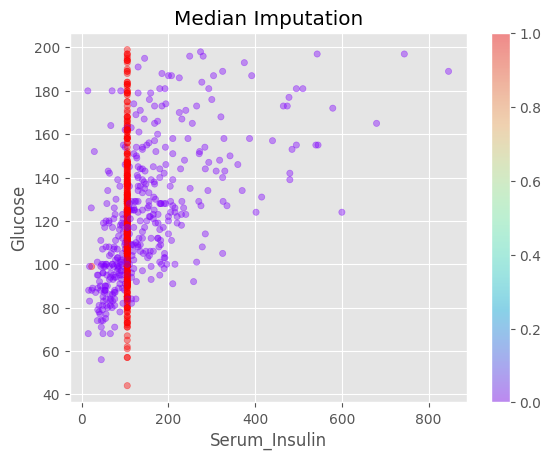

In [ ]:
df_diabetes_mode.plot(
    x='Serum_Insulin',
    y='Glucose',
    kind='scatter',
    alpha=0.4,
    c=nullity,
    cmap='rainbow',
    title='Median Imputation'
)

<Axes: title={'center': 'Median Imputation'}, xlabel='Serum_Insulin', ylabel='Glucose'>

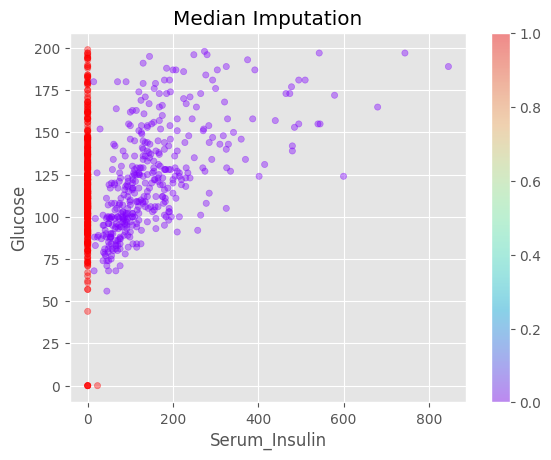

In [ ]:
df_diabetes_constan.plot(
    x='Serum_Insulin',
    y='Glucose',
    kind='scatter',
    alpha=0.4,
    c=nullity,
    cmap='rainbow',
    title='Median Imputation'
)

### Visualizing All Imputations

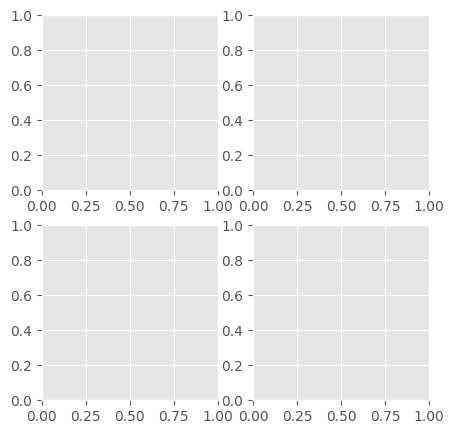

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 5)) # axes dan fig merupakan native syntax python

In [ ]:
axes

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

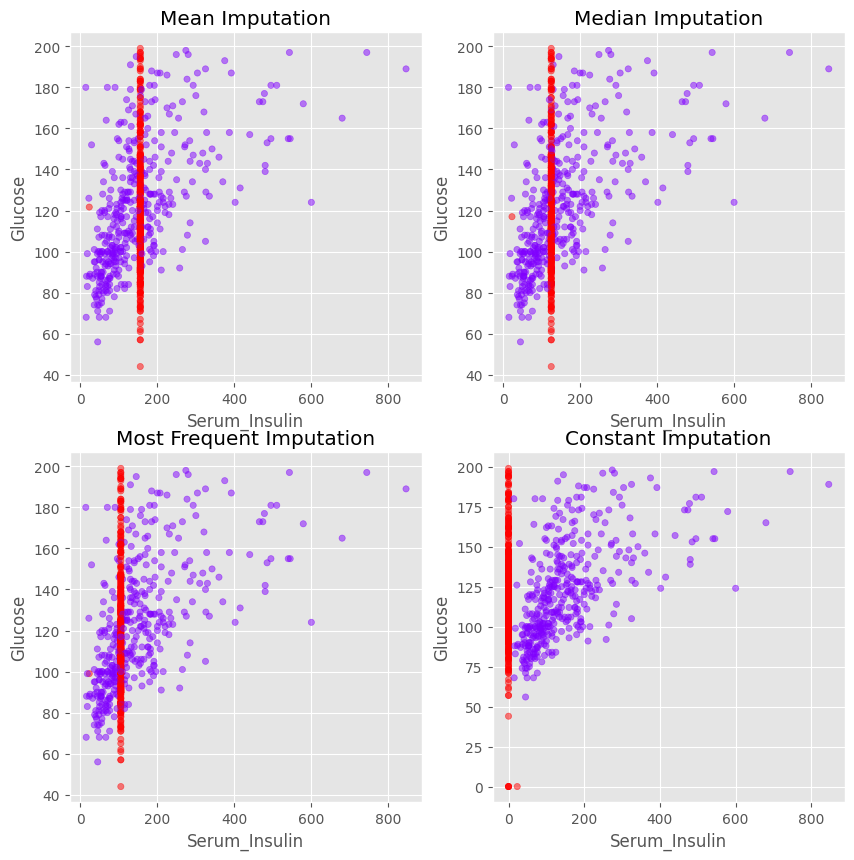

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
imputation = {
    'Mean Imputation': df_diabetes_mean,
    'Median Imputation': df_diabetes_median,
    'Most Frequent Imputation': df_diabetes_mode,
    'Constant Imputation': df_diabetes_constan
}

for ax, df_key in zip(axes.flatten(), imputation):
  imputation[df_key].plot(
      x='Serum_Insulin',
      y='Glucose',
      kind='scatter',
      alpha=0.5,
      c=nullity,
      cmap='rainbow',
      ax=ax,
      colorbar=False, title=df_key
  )

## Label Encoder
Encoding Categorical Variables


In [ ]:
users = pd.DataFrame(
    data={
      'user': [1, 2, 3, 4],
      'subscribed': ['y', 'n', 'n', 'y'],
      'fav_color': ['blue', 'green', 'orange', 'green'],
      'loyalty_badge': ['Gold', 'Silver', 'Silver', 'Platinum']
    }
)
users

,user,subscribed,fav_color,loyalty_badge
0,1,y,blue,Gold
1,2,n,green,Silver
2,3,n,orange,Silver
3,4,y,green,Platinum


### Encoding Binary Variables

### With Pandas

In [ ]:
users['subscribed']

0    y
1    n
2    n
3    y
Name: subscribed, dtype: object

In [ ]:
users["sub_enc"] = users["subscribed"].apply(lambda x: 1 if x == 'y' else 0)

In [ ]:
users

,user,subscribed,fav_color,loyalty_badge,sub_enc
0,1,y,blue,Gold,1
1,2,n,green,Silver,0
2,3,n,orange,Silver,0
3,4,y,green,Platinum,1


### With Scikit-learn

In [ ]:
le = LabelEncoder()
users['sub_enc'] = le.fit_transform(users['subscribed'])

#### Encoding Kategorikal - Ordinal

In [ ]:
users

,user,subscribed,fav_color,loyalty_badge,sub_enc
0,1,y,blue,Gold,1
1,2,n,green,Silver,0
2,3,n,orange,Silver,0
3,4,y,green,Platinum,1


In [ ]:
badge_cat = ['Silver', 'Gold', 'Platinum']
oe = OrdinalEncoder(categories=[badge_cat])

users["badge_enc_oe"] = oe.fit_transform(users[["loyalty_badge"]])
users["badge_enc_oe"] = users["badge_enc_oe"].astype('int')

print(users[["loyalty_badge", "badge_enc_oe"]])

  loyalty_badge  badge_enc_oe
0          Gold             1
1        Silver             0
2        Silver             0
3      Platinum             2


#### Encoding Kategorikal - Nominal

In [ ]:
users['color_enc'] = le.fit_transform(users['fav_color'])

In [ ]:
users

,user,subscribed,fav_color,loyalty_badge,sub_enc,badge_enc_oe,color_enc
0,1,y,blue,Gold,1,1,0
1,2,n,green,Silver,0,0,1
2,3,n,orange,Silver,0,0,2
3,4,y,green,Platinum,1,2,1


## One-Hot Encoding
To Categorical-Nominal Feature|

In [ ]:
users["fav_color"]

0      blue
1     green
2    orange
3     green
Name: fav_color, dtype: object

In [ ]:
pd.get_dummies(users["fav_color"])

,blue,green,orange
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0


In [ ]:
users = pd.get_dummies(users, columns = ["fav_color"])
users

,user,subscribed,loyalty_badge,sub_enc,badge_enc_oe,color_enc,fav_color_blue,fav_color_green,fav_color_orange
0,1,y,Gold,1,1,0,1,0,0
1,2,n,Silver,0,0,1,0,1,0
2,3,n,Silver,0,0,2,0,0,1
3,4,y,Platinum,1,2,1,0,1,0


## Standardization

### Log Normalization

In [ ]:
df = pd.DataFrame(
    data={
        "col1":[1, 1.20, 0.75, 1.60],
        "col2":[3, 45.5, 28.0, 100]
    }
)

df

,col1,col2
0,1.00,3.0
1,1.20,45.5
2,0.75,28.0
3,1.60,100.0


In [ ]:
df.var()

col1       0.128958
col2    1691.729167
dtype: float64

In [ ]:
df["log_2"] = np.log(df["col2"])
print(df)

   col1   col2     log_2
0  1.00    3.0  1.098612
1  1.20   45.5  3.817712
2  0.75   28.0  3.332205
3  1.60  100.0  4.605170


In [ ]:
df[['col1', 'log_2']].var()

col1     0.128958
log_2    2.262886
dtype: float64

### Feature Scaling

In [ ]:
scaller = StandardScaler()
df_scaled = pd.DataFrame(
    data = scaller.fit_transform(df),
    columns= df.columns
)

In [ ]:
print(df_scaled)

       col1      col2     log_2
0 -0.442127 -1.154542 -1.623341
1  0.200967  0.038602  0.463854
2 -1.245995 -0.452693  0.091176
3  1.487156  1.568634  1.068311


In [ ]:
print(df_scaled.var())

col1     1.333333
col2     1.333333
log_2    1.333333
dtype: float64


## Train-test Splitting
Case: Standardized data and modeling with K-Nearest Neighbor


### Checking Missing Values

In [ ]:
df_diabetes_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    float64
 1   Glucose            768 non-null    float64
 2   Diastolic_BP       768 non-null    float64
 3   Skin_Fold          768 non-null    float64
 4   Serum_Insulin      768 non-null    float64
 5   BMI                768 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    float64
 8   Class              768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [ ]:
df_diabetes_median.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


### Dataset Splitting

In [ ]:
X = df_diabetes_median.iloc[:,:-1]
y = df_diabetes_median['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [ ]:
y_train.shape, y_test.shape

((614,), (154,))

### Modeling with KNN

In [ ]:
knn = KNeighborsClassifier()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Evaluation Before & After Scaling

In [ ]:
knn.fit(X_train, y_train)
print("Accuracy - Before Scaled:", knn.score(X_test, y_test))

Accuracy - Before Scaled: 0.6753246753246753


In [ ]:
knn.fit(X_train_scaled, y_train)
print("Accuracy - After Scaled:", knn.score(X_test_scaled, y_test))

Accuracy - After Scaled: 0.7532467532467533


In [ ]:
(0.753 - 0.6753)/0.6753

0.11505997334517991

# Data Preprocessing Bagian II

## Import Library

In [ ]:
# Text Processing
import re
import nltk

# Dataset Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

# ML Modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# ML Model Evaluation
from sklearn.model_selection import cross_val_score

In [ ]:
nltk.download('punkt') # Tokenisasi : memecah suatu word menjadi bagian yg lebih kecil

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords') # Stopword, like is, the, and, etc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

## Import Dataset

In [ ]:
df_spam = pd.read_csv('spam.csv', encoding="latin-1")
df_spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Drop un-meaningful columns

df_spam.drop(
    columns=['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'],
    inplace=True
)
df_spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Rename Columns
df_spam.rename({
    'v1':'label',
    'v2':'message'
}, axis=1, inplace=True)
df_spam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df_spam.loc[0, 'message']

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

## Dataset Exploration

### Label Counts

disini untuk label counts, disini saya akan melihat berdasarkan visualisasinya dan juga jumlahnya dari tabel tersebut

ham     4825
spam     747
Name: label, dtype: int64


<BarContainer object of 2 artists>

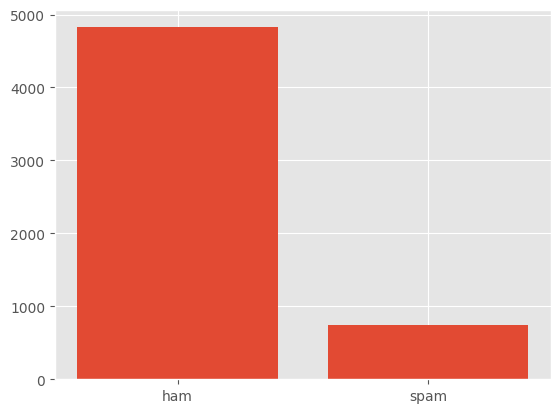

In [ ]:
## Label Counts
print(df_spam['label'].value_counts())
plt.bar(df_spam['label'].unique(), df_spam['label'].value_counts())

### Message Length

In [ ]:
df_spam['message_len'] = df_spam['message'].apply(len)
df_spam.sort_values(by='message_len', ascending=False).head(10)

,label,message,message_len
1084,ham,For me the love should start with attraction.i...,910
1862,ham,The last thing i ever wanted to do was hurt yo...,790
2433,ham,Indians r poor but India is not a poor country...,632
1578,ham,How to Make a girl Happy? It's not at all diff...,611
2847,ham,Sad story of a Man - Last week was my b'day. M...,588
2157,ham,Sad story of a Man - Last week was my b'day. M...,588
2379,ham,"Good evening Sir, hope you are having a nice d...",482
3015,ham,"&lt;#&gt; is fast approaching. So, Wish u a v...",461
1512,ham,"Hey sweet, I was wondering when you had a mome...",458
2369,ham,A Boy loved a gal. He propsd bt she didnt mind...,450


## Text Preprocessing

### Text Cleaning

In [ ]:
myText = "Aku dan kamu suka dancow"
myText.split()

['Aku', 'dan', 'kamu', 'suka', 'dancow']

In [ ]:
# Define The function to cleaning the text
def cleaning_text(text):
  # Replacing all non-alphabetic characters with a space
  # re.sub(pattern, replacament_string, string_target, count, flags)
  sms = re.sub('[^a-zA-Z]', ' ', text)

  # invert to lowercase
  sms = sms.lower()

  # Splitting text (check the defaults of split func!)
  sms = sms.split()

   # Rejoining text
  sms = ' '.join(sms)

  return sms

In [ ]:
df_spam['message_cleaned'] = df_spam['message'].apply(cleaning_text)
df_spam['message_cleaned'].head()

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in a wkly comp to win fa cup final ...
3          u dun say so early hor u c already then say
4    nah i don t think he goes to usf he lives arou...
Name: message_cleaned, dtype: object

In [173]:
df_spam.loc[:5,['message',	'message_cleaned']]

,message,message_cleaned
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...
5,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey there darling it s been week s now...


In [ ]:
df_spam.head()

,label,message,message_len,message_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...


### Tokenization

In [ ]:
df_spam['Tokenization_text'] = df_spam['message_cleaned'].apply(nltk.word_tokenize)
df_spam.head()

,label,message,message_len,message_cleaned,Tokenization_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,..."


### Remove Stopword

In [ ]:
# Removing the stopwords function
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

In [ ]:
df_spam["no_stopword_text"] = df_spam["Tokenization_text"].apply(remove_stopwords)
df_spam.head()

,label,message,message_len,message_cleaned,Tokenization_text,no_stopword_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]"


### Lemmatization

In [185]:
df_spam.loc[27:30, ['no_stopword_text',	'lemmatized_text']]

,no_stopword_text,lemmatized_text
27,"[catch, bus, frying, egg, make, tea, eating, m...","[catch, bus, fry, egg, make, tea, eat, mom, le..."
28,"[back, amp, packing, car, let, know, room]","[back, amp, pack, car, let, know, room]"
29,"[ahhh, work, vaguely, remember, feel, like, lol]","[ahhh, work, vaguely, remember, feel, like, lol]"
30,"[wait, still, clear, sure, sarcastic, x, want,...","[wait, still, clear, sure, sarcastic, x, want,..."


In [ ]:
lemmatizer = WordNetLemmatizer()

# lemmatize string function
def lemmatize_word(text):
    # provide context i.e. part-of-speech (pos)
    lemmas = [lemmatizer.lemmatize(word, pos='v') for word in text]
    return lemmas

In [ ]:
df_spam["lemmatized_text"] = df_spam["no_stopword_text"].apply(lemmatize_word)
df_spam.head()

,label,message,message_len,message_cleaned,Tokenization_text,no_stopword_text,lemmatized_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, live, around, though]"


In [ ]:
df_spam.columns = df_spam.columns.str.lower()

### Vectorization

#### Creating a corpus of lemmatized text

In [ ]:
# Creating a corpus of text feature to encode further into vectorized form
corpus = []
for i in df_spam["lemmatized_text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)

print("The First 10 lines in corpus : \n")
print(*corpus[:10], sep="\n")

The First 10 lines in corpus : 

go jurong point crazy available bugis n great world la e buffet cine get amore wat
ok lar joke wif u oni
free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply
u dun say early hor u c already say
nah think go usf live around though
freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv
even brother like speak treat like aid patent
per request melle melle oru minnaminunginte nurungu vettam set callertune callers press copy friends callertune
winner value network customer select receivea prize reward claim call claim code kl valid hours
mobile months u r entitle update latest colour mobiles camera free call mobile update co free


#### Converting the corpus in vector form

In [ ]:
# Changing text data in to numbers.
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()

# Let's have a look at our feature
X.dtype

dtype('float64')

In [194]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [193]:
X.shape

(5572, 6578)

#### Label Encoding the classes in Target

In [ ]:
# Label encode the Target and use it as y
le = LabelEncoder( )
df_spam["label"] = le.fit_transform(df_spam["label"])

## Model Building

In [ ]:
# Setting values for labels and feature as y and X (we already did X in vectorizing...)
y = df_spam["label"]

# Splitting the testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Testing on the following classifiers
classifiers = [
    MultinomialNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC()
]

for cls in classifiers:
    cls.fit(X_train, y_train)

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {
    0: "NaiveBayes",
    1: "RandomForest",
    2: "KNeighbours",
    3: "SVC"
}

# Model Evaluation

In [ ]:
# Cross-Validation
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,y_train, scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

NaiveBayes: 0.966568 
RandomForest: 0.977787 
KNeighbours: 0.914740 
SVC: 0.976217 
